In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt

In [30]:



def cwnd_plot(file_path):
# Load the data from the file
    data = np.loadtxt(file_path)
    time = data[:, 0]  
    cwnd = data[:, 2]  

    plt.figure(figsize=(8, 6))
    plt.plot(time, cwnd, label="Cwnd", color="red", linewidth=1)


    plt.xlabel('Time ')
    plt.ylabel('cwnd')
    plt.title('Cwnd vs. Time')

    plt.grid(True)
    plt.legend()

    plt.show()



def que_plot(file_path):
    enq = []
    deq = []

    with open(file_path, 'r') as file:  
        for line in file:

            enqueue_match = re.search(r'\+ ([\d.]+) /NodeList/1/DeviceList/1/.*?Enqueue', line)
            if enqueue_match:
                # print("hi")
                enq.append(float(enqueue_match.group(1)))

            # Extract Dequeue timestamps
            dequeue_match = re.search(r'- ([\d.]+) /NodeList/1/DeviceList/1/.*?Dequeue', line)
            if dequeue_match:
                deq.append(float(dequeue_match.group(1)))

    deq_minus_enq = []
    for dequeue_time, enqueue_time in zip(deq, enq):
        deq_minus_enq.append(dequeue_time - enqueue_time)
    # print(deq_minus_enq)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(deq, deq_minus_enq, linestyle='-', color='r', label='delay')


    # Customize the plot
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Delay', fontsize=12)
    plt.title('Delay vs Time', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


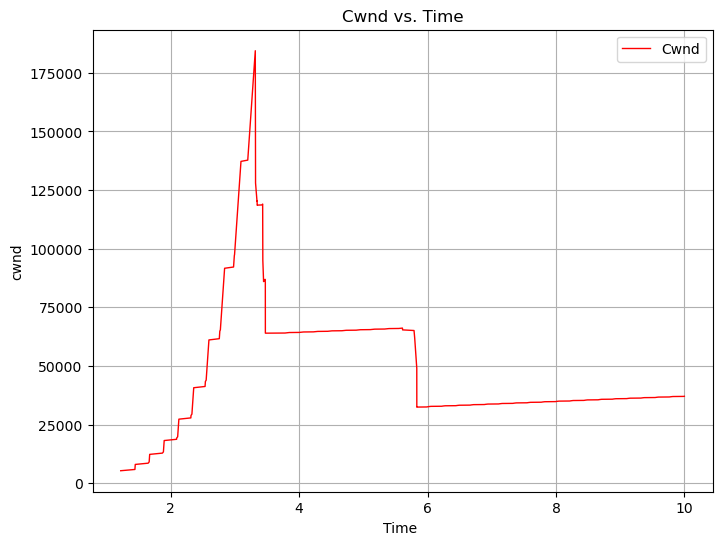

In [33]:
cwnd_plot("Q1/tcp-example.cwnd")

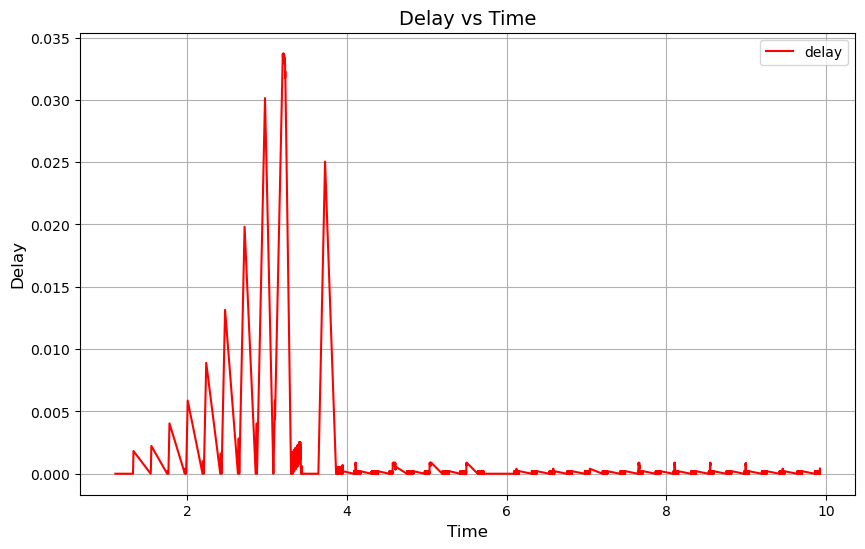

In [34]:
que_plot("Q1/tcp-example.tr")

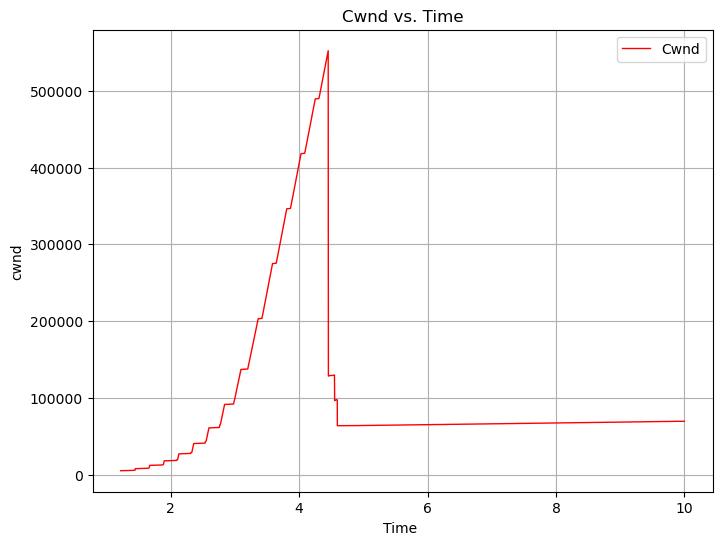

In [35]:
cwnd_plot("Q2/tcp-example.cwnd")

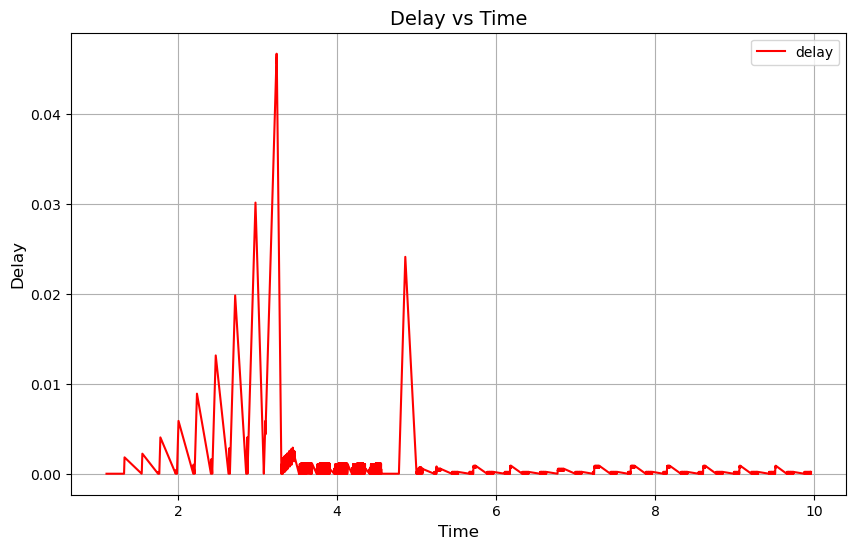

In [36]:
que_plot("Q2/tcp-example.tr")

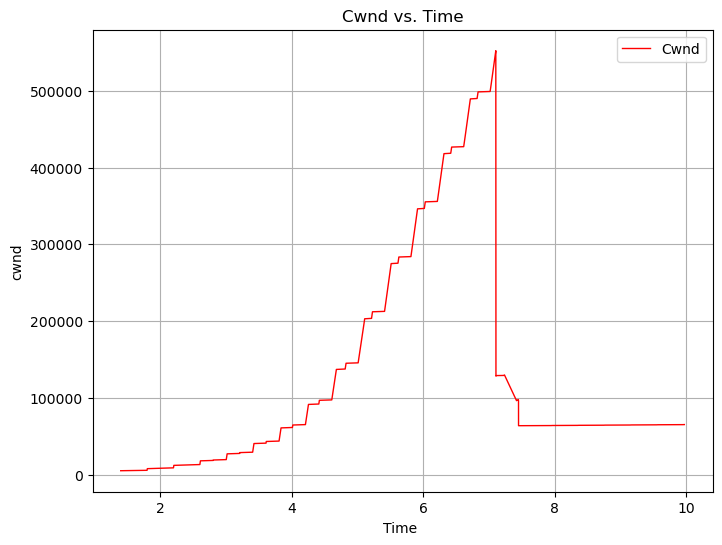

In [37]:
cwnd_plot("Q3/tcp-example.cwnd")

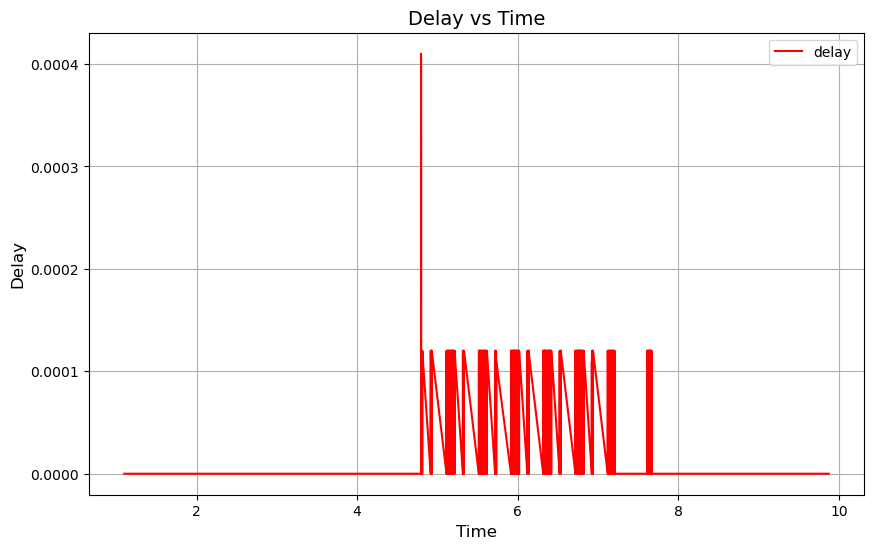

In [38]:
que_plot("Q3/tcp-example.tr")